In [4]:
import psycopg2
import requests
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import shape, mapping
import matplotlib.pyplot as plt

In [5]:
connection = psycopg2.connect(database='postgis_31_sample', user='postgres', password='password')

cursor = connection.cursor()

# cursor.execute("CREATE TABLE art_pieces ( ID SERIAL PRIMARY KEY, code VARCHAR(255), location GEOMETRY)")
# print('connected')


In [6]:
connection.commit()

In [7]:
url='http://coagisweb.cabq.gov/arcgis/rest/services/public/PublicArt/MapServer/0/query'

params={"where":"1=1","outFields":"*","outSR":"4326","f":"json"}

r=requests.get(url,params=params)
data=r.json()


In [8]:
x = data['features'][0]['attributes']
x

{'OBJECTID': 1350949,
 'ART_CODE': '101',
 'TITLE': 'Almond Blossom/Astronomy',
 'TYPE': 'public sculpture',
 'YEAR': '1986',
 'ARTIST': 'David Anderson',
 'ADDRESS': '4440 Osuna NE',
 'LOCATION': 'Osuna Median bet.Jefferson/ W.Frontage Rd',
 'X': -106.5918383,
 'Y': 35.1555,
 'IMAGE_URL': 'http://www.flickr.com/photos/abqpublicart/6831137393/',
 'JPG_URL': 'http://farm8.staticflickr.com/7153/6831137393_fa38634fd7_m.jpg'}

In [9]:
for feat in data['features']:
    i = feat['attributes']['ADDRESS']
    print(i)

4440 Osuna NE
Lomas & 16th St. NW
San Pedro &  Los Arboles NE
620 Georgia SE
Morris & Lexington NE
400 Marquette NW
2200 Sunport Blvd SE
400 Marquette NW
11800 Sunset Gardens SW
Menaul Blvd. at 12th Street NW
None
7525 Zuni SE
Tramway & Central NE
5th St & Copper NW
Lomas and Rancho Seco NW
2000 Mountain Rd NW
1420 Edith NE
401 2nd St
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
1420 Edith NE
401 2nd St.
3825 4th Street NW
3825 4th Street NW
3825 4th Street NW
3825 4th Street NW
3825 4th Street NW
3825 4th Street NW
330 Tijeras Ave NW
1420 Edith NE
903 10th St SW
Central and San Felipe NW
6500 Los Volcanes NW
714 Seventh St SW
1700 Yale SE
400 Marquette NW
San Mateo at Gibson SE
San Mateo at Easter

In [10]:
dfcols = data['features'][0]['attributes'].keys()
dfcols = list(dfcols)


In [11]:
mydict = {
    'attr': dfcols
}
mydict

{'attr': ['OBJECTID',
  'ART_CODE',
  'TITLE',
  'TYPE',
  'YEAR',
  'ARTIST',
  'ADDRESS',
  'LOCATION',
  'X',
  'Y',
  'IMAGE_URL',
  'JPG_URL']}

In [12]:
for col in dfcols:
    ls = []
    for feat in data['features']:
        ls.append(feat['attributes'][col])
    mydict[col] = ls
mydict

{'attr': ['OBJECTID',
  'ART_CODE',
  'TITLE',
  'TYPE',
  'YEAR',
  'ARTIST',
  'ADDRESS',
  'LOCATION',
  'X',
  'Y',
  'IMAGE_URL',
  'JPG_URL'],
 'OBJECTID': [1350949,
  1350950,
  1350951,
  1350952,
  1350953,
  1350954,
  1350955,
  1350956,
  1350957,
  1350958,
  1350959,
  1350960,
  1350961,
  1350962,
  1350963,
  1350964,
  1350965,
  1350966,
  1350967,
  1350968,
  1350969,
  1350970,
  1350971,
  1350972,
  1350973,
  1350974,
  1350975,
  1350976,
  1350977,
  1350978,
  1350979,
  1350980,
  1350981,
  1350982,
  1350983,
  1350984,
  1350985,
  1350986,
  1350987,
  1350988,
  1350989,
  1350990,
  1350991,
  1350992,
  1350993,
  1350994,
  1350995,
  1350996,
  1350997,
  1350998,
  1350999,
  1351000,
  1351001,
  1351002,
  1351003,
  1351004,
  1351005,
  1351006,
  1351007,
  1351008,
  1351009,
  1351010,
  1351011,
  1351012,
  1351013,
  1351014,
  1351015,
  1351016,
  1351017,
  1351018,
  1351019,
  1351020,
  1351021,
  1351022,
  1351023,
  1351024,
  1

In [13]:
del mydict['attr']

In [14]:
mydf = pd.DataFrame(mydict)

In [15]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBJECTID   844 non-null    int64  
 1   ART_CODE   828 non-null    object 
 2   TITLE      828 non-null    object 
 3   TYPE       827 non-null    object 
 4   YEAR       826 non-null    object 
 5   ARTIST     841 non-null    object 
 6   ADDRESS    819 non-null    object 
 7   LOCATION   828 non-null    object 
 8   X          827 non-null    float64
 9   Y          827 non-null    float64
 10  IMAGE_URL  828 non-null    object 
 11  JPG_URL    828 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 79.2+ KB


In [16]:
gdf = gpd.GeoDataFrame(
    mydf, geometry=gpd.points_from_xy(mydf.X, mydf.Y))

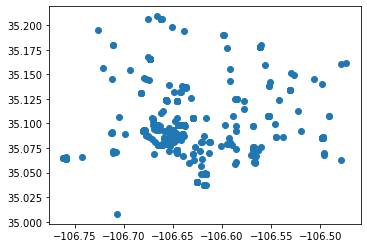

In [17]:
gdf.plot()

In [18]:
gdf.head()

,OBJECTID,ART_CODE,TITLE,TYPE,YEAR,ARTIST,ADDRESS,LOCATION,X,Y,IMAGE_URL,JPG_URL,geometry
0,1350949,101,Almond Blossom/Astronomy,public sculpture,1986,David Anderson,4440 Osuna NE,Osuna Median bet.Jefferson/ W.Frontage Rd,-106.591838,35.1555,http://www.flickr.com/photos/abqpublicart/6831...,http://farm8.staticflickr.com/7153/6831137393_...,POINT (-106.59184 35.15550)
1,1350950,102,Formas Esperando Palabra de Otros Mundos,public sculpture,1983,Federico Armijo,Lomas & 16th St. NW,Old Town,-106.664177,35.0931,http://www.flickr.com/photos/abqpublicart/2479...,http://farm3.staticflickr.com/2167/2479129916_...,POINT (-106.66418 35.09310)
2,1350951,104,Sumer #24,public sculpture,1999,Larry Bell,San Pedro & Los Arboles NE,Quigley Park,-106.577991,35.1143,http://www.flickr.com/photos/abqpublicart/9087...,http://farm2.staticflickr.com/1416/908720823_e...,POINT (-106.57799 35.11430)
3,1350952,105,Images,public sculpture,1988,Rod Blankley,620 Georgia SE,Emerson School / John Carillo Park,-106.570886,35.0682,http://www.flickr.com/photos/abqpublicart/6831...,http://farm8.staticflickr.com/7012/6831253349_...,POINT (-106.57089 35.06820)
4,1350953,106,The Hounds of Enchantment,public sculpture,1998,Peter Broussard,Morris & Lexington NE,Matheson Park,-106.523010,35.1121,http://www.flickr.com/photos/abqpublicart/1030...,http://farm2.staticflickr.com/1243/1030960964_...,POINT (-106.52301 35.11210)


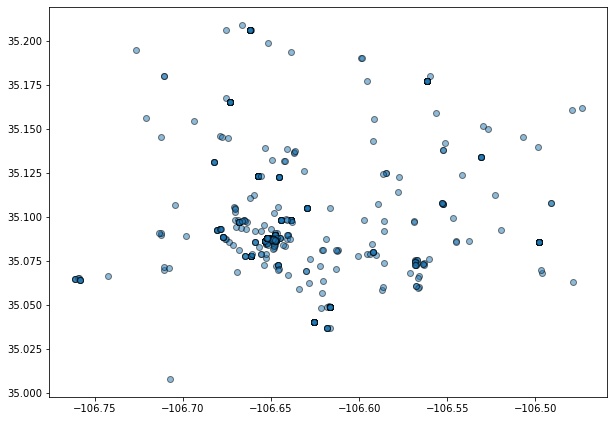

In [22]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
gdf = gdf.set_crs(epsg=3857)


In [23]:
import contextily as ctx

ModuleNotFoundError: No module named 'contextily'

In [21]:
gdf.set_geometry()

TypeError: Input must be valid geometry objects: {'x': -106.59183830022498, 'y': 35.155500000061544}

In [ ]:
connection.close()